Nov 24

1. compare the two models of N_GC(M_z)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from astropy.table import Table

In [5]:
from tqdm import tqdm

In [6]:
import astropy.io.fits as fits

In [7]:
from IPython.display import display, Math

In [8]:
#load data Harris-Siena
data3 = fits.getdata('/data/lemn/results/NGC_Magz.fits')

In [9]:
y = data3['NGCs']
x = data3['Mag z']
yerr = data3['err GC']

In [10]:
a = np.argwhere(~np.isnan(x)) #find idx of non nan values in Mag z

In [11]:
x    = x[a]
y    = y[a]
yerr = yerr[a]

In [12]:
x    = x.reshape((len(a)))
y    = y.reshape((len(a)))
yerr = yerr.reshape((len(a)))

In [18]:
Mag_z = np.sort(x)

1 power law

In [13]:
power1 = fits.getdata('/data/lemn/results/MCMC_samples_1powerlaw.fits')
a1     = power1['a']
alpha1 = power1['alpha']
logf1  = power1['log(f)']

In [14]:
flat_samples1 = np.stack((a1, alpha1, logf1),axis=-1)

In [15]:
ndim1 = 3

In [16]:
#randomly pick 100 parameter sets out of the samples
inds = np.random.randint(len(flat_samples1), size=100)

In [17]:
def model1(theta, x):
    a, alpha, log_f = theta
    model1 = a*np.exp(-alpha*x) 
    return model1

In [21]:
sig_1pow = np.zeros(len(Mag_z))
NGC_1pow = np.zeros(len(Mag_z))
for j in tqdm(range(0,len(Mag_z))):
    N_test = np.zeros(len(inds))
    i = 0
    for ind in inds:
        sample = flat_samples1[ind]
        N_test[i] = model1(sample,Mag_z[j])
        i+= 1
    sig_1pow[j] = np.std(N_test)
    NGC_1pow[j] = np.mean(N_test)

100%|██████████| 289/289 [00:00<00:00, 2713.45it/s]


broken power law

In [22]:
power2 = fits.getdata('/data/lemn/results/MCMC_samples.fits')

In [23]:
a2     = power2['a']
alpha2 = power2['alpha']
b2     = power2['b']
beta2  = power2['beta']
M2     = power2['M1']
logf2  = power2['log(f)']

In [24]:
flat_samples2 = np.stack((a2, alpha2,b2,beta2,M2, logf2),axis=-1)

In [25]:
def model2(theta, x):
    a2, alpha2, b2, beta2, M2, log_f2 = theta
    model2 = a2*(x/M2)**alpha2 + b2*(x/M2)**beta2
    return model2

In [26]:
ndim = 6

In [27]:
#randomly pick 100 parameter sets out of the samples
inds = np.random.randint(len(flat_samples2), size=100)

In [28]:
sig_2 = np.zeros(len(Mag_z))
NGC_2 = np.zeros(len(Mag_z))
for j in tqdm(range(0,len(Mag_z))):
    N_test = np.zeros(len(inds))
    i = 0
    for ind in inds:
        sample = flat_samples2[ind]
        N_test[i] = model2(sample,Mag_z[j])
        i+= 1
    sig_2[j] = np.std(N_test)
    NGC_2[j] = np.mean(N_test)

100%|██████████| 289/289 [00:00<00:00, 3497.63it/s]


compare the two models

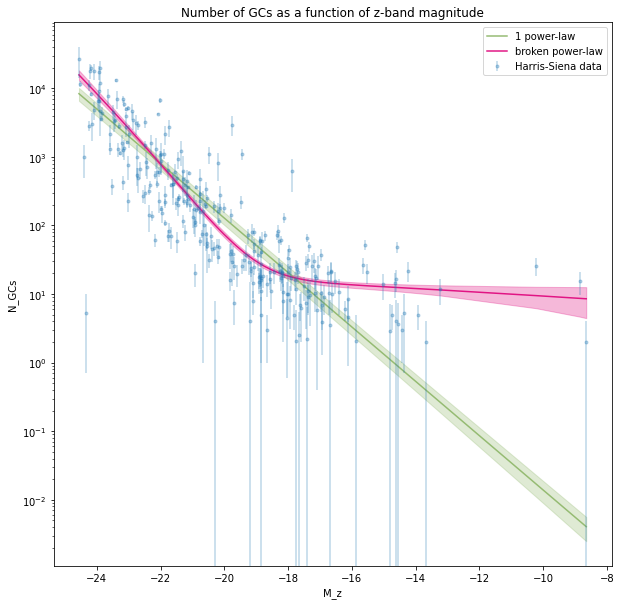

In [37]:
plt.figure(figsize=(10,10))
plt.yscale('log')
plt.fill_between(Mag_z, NGC_1pow-sig_1pow,NGC_1pow+sig_1pow, color='#95bb72' , alpha=0.3)
plt.fill_between(Mag_z, NGC_2-sig_2,NGC_2+sig_2, color='#e11584', alpha=0.3)
plt.plot(Mag_z, NGC_1pow, color = '#95bb72',label='1 power-law')
plt.plot(Mag_z, NGC_2, color='#e11584',label='broken power-law')
plt.errorbar(x, y, yerr=yerr, fmt=".", alpha=0.3, label ='Harris-Siena data')
plt.xlabel('M_z')
plt.ylabel('N_GCs')
plt.title('Number of GCs as a function of z-band magnitude')
plt.legend()
#plt.savefig('two_models_NGC(M_z).pdf')
plt.show()